In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
import keras

In [2]:
dir(keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__internal__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'activations',
 'api',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'dtensor',
 'estimator',
 'experimental',
 'export',
 'initializers',
 'layers',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'optimizers',
 'preprocessing',
 'protobuf',
 'regularizers',
 'saving',
 'src',
 'utils']

In [3]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [4]:
dir(keras.datasets.mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [2]:
X_train, y_train = keras.datasets.mnist.load_data()[0]
X_test, y_test = keras.datasets.mnist.load_data()[1]

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [3]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# lets visualize the data given

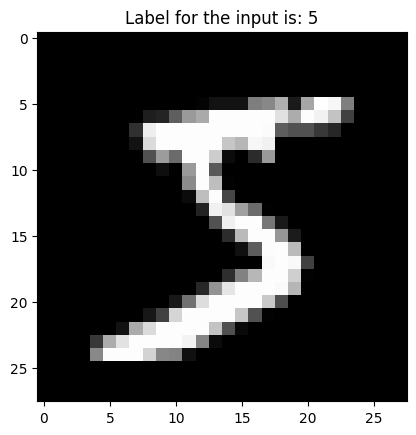

In [9]:
plt.imshow(X_train[0],cmap = 'gray')
plt.title(f'Label for the input is: {y_train[0]}')
plt.show()

In [10]:
np.unique(y_train, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

# Let's visualize the high dimension data (28 * 28) to 2D using PCA and TSNE

## 1. PCA

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000,784)

In [12]:
import sklearn

In [15]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [36]:
newx = pca.fit_transform(X_train)

In [37]:
pca.explained_variance_ratio_


array([0.09704664, 0.07095924])

In [39]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 2,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [41]:
pca.components_.shape

(2, 784)

In [44]:
nx = newx[:,0]
ny = newx[:,1]

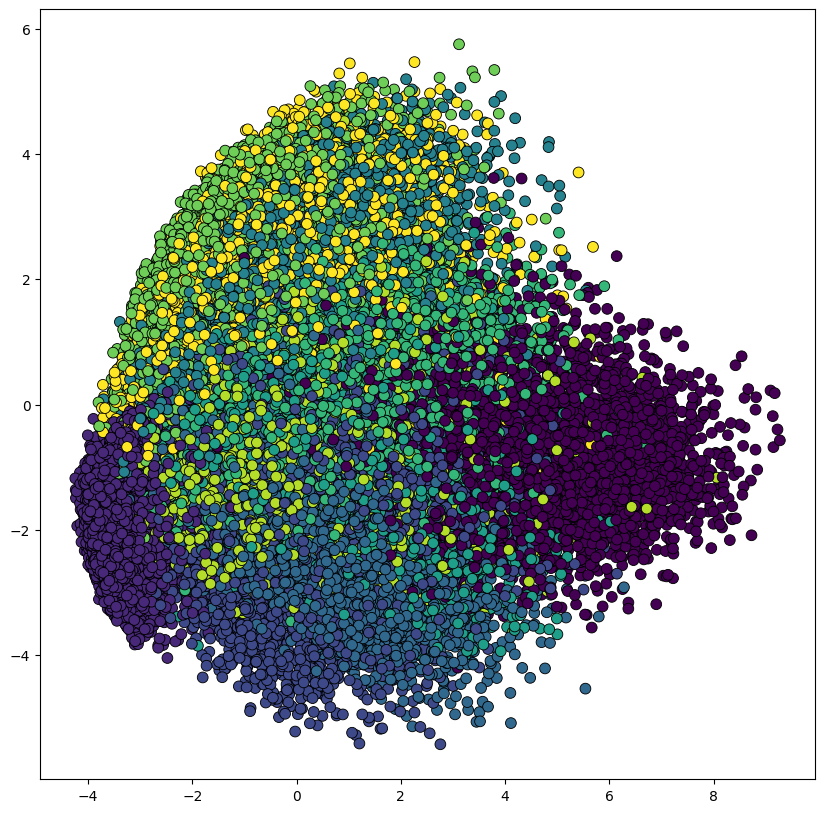

In [45]:
plt.figure(figsize= (10,10))
sbn.scatterplot(x = nx, y = ny, c = y_train, cmap='viridis',edgecolor='k', s=60)
plt.show()

lets take sample from the data only

In [53]:
rand_index = np.random.choice(60000, 1000 , replace = False)

In [60]:
new_nx = nx[rand_index]
new_ny = ny[rand_index]
new_y = y_train[rand_index]

In [63]:
new_y.shape

(1000,)

In [68]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(sbn.husl_palette(len(np.unique(new_y))))

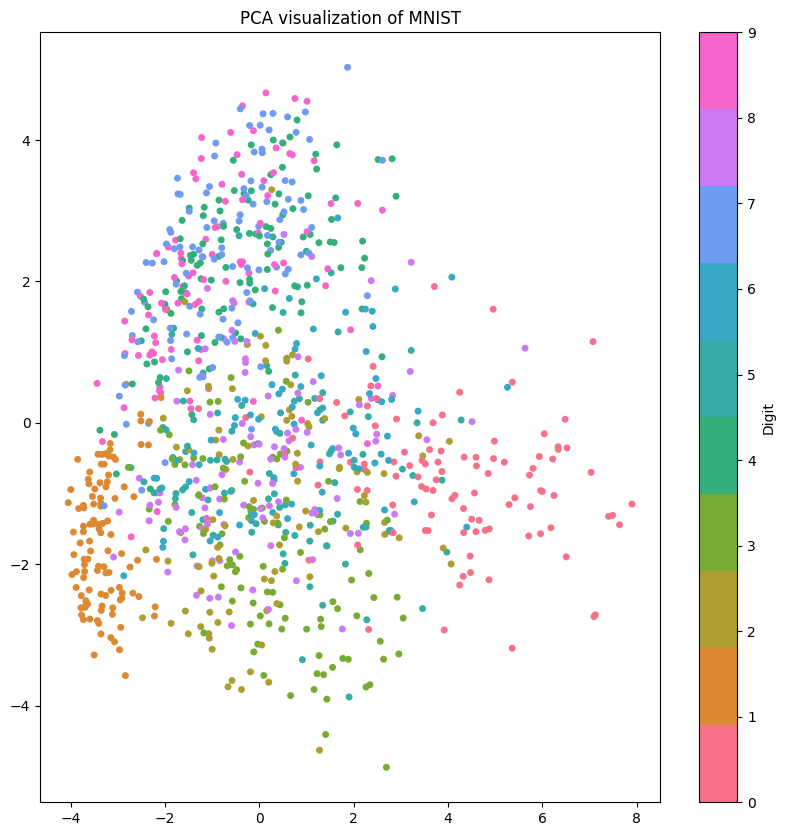

In [77]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_title('PCA visualization of MNIST')
im = ax.scatter(new_nx, new_ny, s=25, c=new_y, cmap=cmap, edgecolor='none')

cbar= fig.colorbar(im, ax=ax,label='Digit')

It seems pretty bad right? now lets try with TSNE

## 2. TSNE

In [71]:
X_train.shape

(60000, 784)

In [72]:
y_train.shape

(60000,)

In [74]:
from openTSNE import TSNE

In [75]:
tsne_x = X_train[rand_index]
tsne_y = y_train[rand_index]


In [76]:
tsne = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(tsne_x)

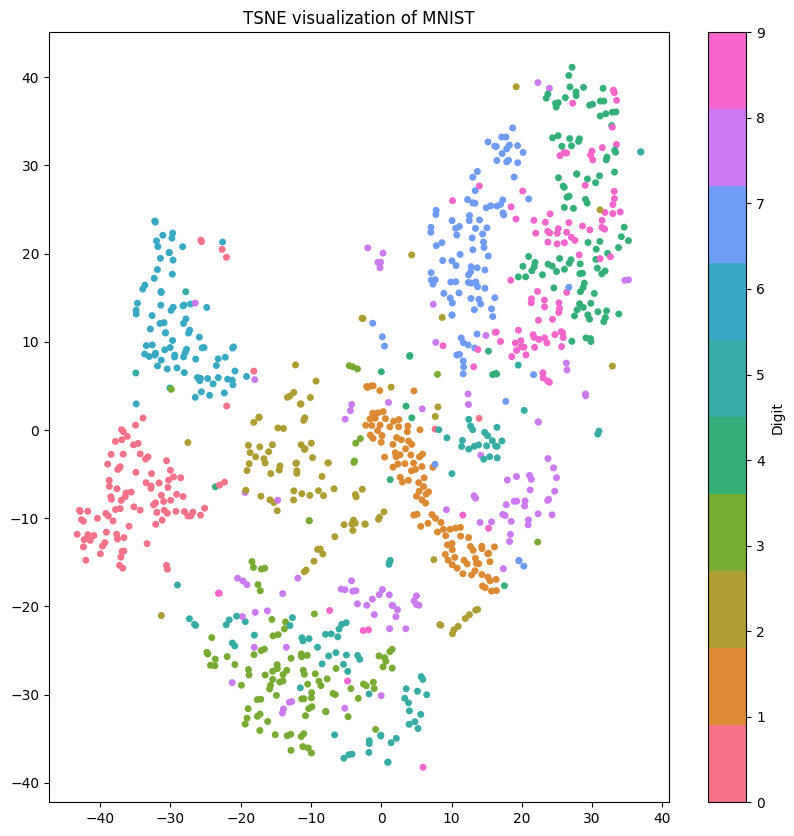

In [78]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_title('TSNE visualization of MNIST')
im = ax.scatter(tsne[:,0], tsne[:,1], s=25, c=new_y, cmap=cmap, edgecolor='none')

cbar= fig.colorbar(im, ax=ax,label='Digit')

somewhat better than PCA but not that good. now lets see autoencoders

# Autoencoder

In [5]:
from tensorflow.keras.models import Model


In [6]:
X_train.shape

(60000, 784)

In [7]:
inp_layer = Input(shape = (784,), name = 'inp')

h1 = Dense(256, activation = 'relu', name ='h1')(inp_layer)
h2 = Dense(128, activation = 'relu', name = 'h2')(h1)
h3 = Dense(64, activation = 'relu', name = 'h3')(h2)
h4 = Dense(16, activation = 'relu', name = 'h4')(h3)

h5 = Dense(64, activation = 'relu', name = 'h5')(h4)
h6 = Dense(128, activation = 'relu', name = 'h6')(h5)
h7 = Dense(256, activation = 'relu', name = 'h7')(h6)
h8 = Dense(784, activation = 'sigmoid', name = 'h8')(h7)

In [87]:
model = Model(inp_layer,h8)

In [88]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inp (InputLayer)            [(None, 784)]             0         
                                                                 
 h1 (Dense)                  (None, 256)               200960    
                                                                 
 h2 (Dense)                  (None, 128)               32896     
                                                                 
 h3 (Dense)                  (None, 64)                8256      
                                                                 
 h4 (Dense)                  (None, 16)                1040      
                                                                 
 h5 (Dense)                  (None, 64)                1088      
                                                                 
 h6 (Dense)                  (None, 128)               8320

so encoder is till h4 layer. and then decoder starts

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mape'])

hist = model.fit(X_train, X_train, epochs = 40, batch_size = 256, validation_set = (X_test,X_test), shuffle = True,verbose= 1)

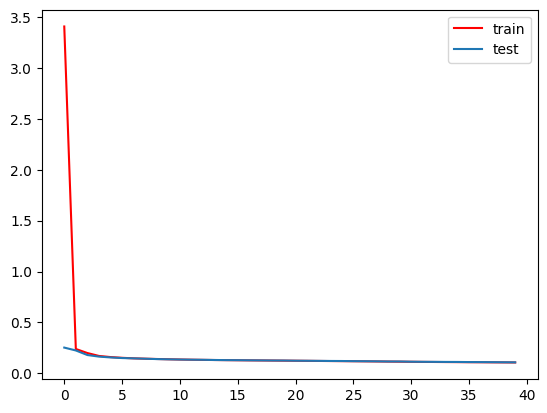

In [119]:
plt.plot(hist.history['loss'], label = 'train',c = 'red')
plt.plot(hist.history['val_loss'], label = 'test')
plt.legend()


In [131]:
xxxxx = model.predict(X_test[0].reshape(1,-1))

1/1 [==============================] - 0s 190ms/step


7


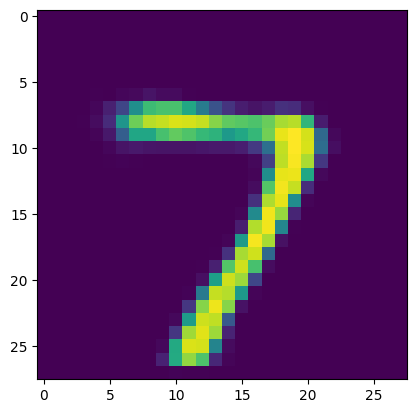

In [135]:
plt.imshow(xxxxx.reshape(28,28))
print(y_test[0])

In [140]:
dir(keras.losses)

['BinaryCrossentropy',
 'BinaryFocalCrossentropy',
 'CategoricalCrossentropy',
 'CategoricalFocalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'Hinge',
 'Huber',
 'KLD',
 'KLDivergence',
 'LogCosh',
 'Loss',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'Poisson',
 'Reduction',
 'SparseCategoricalCrossentropy',
 'SquaredHinge',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'binary_crossentropy',
 'binary_focal_crossentropy',
 'categorical_crossentropy',
 'categorical_focal_crossentropy',
 'categorical_hinge',
 'cosine_similarity',
 'deserialize',
 'get',
 'hinge',
 'huber',
 'kl_divergence',
 'kld',
 'kullback_leibler_divergence',
 'log_cosh',
 'logcosh',
 'mae',
 'mape',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'mean_squared_logarithmic_error',
 'mse',
 'ms

In [8]:
model1 = Model(inp_layer,h8)

model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'mape')

hist1 = model1.fit(X_train, X_train, epochs = 100, batch_size = 256, shuffle = True, validation_data = (X_test,X_test))

Epoch 1/100
235/235 [==============================] - 8s 8ms/step - loss: 0.2432 - mape: 68041920.0000 - val_loss: 0.1649 - val_mape: 30549682.0000
Epoch 2/100
235/235 [==============================] - 2s 6ms/step - loss: 0.1508 - mape: 24520086.0000 - val_loss: 0.1409 - val_mape: 20278294.0000
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1357 - mape: 19081588.0000 - val_loss: 0.1292 - val_mape: 17782634.0000
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1274 - mape: 16320706.0000 - val_loss: 0.1240 - val_mape: 15615050.0000
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1232 - mape: 14976219.0000 - val_loss: 0.1212 - val_mape: 13779167.0000
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1200 - mape: 13970402.0000 - val_loss: 0.1171 - val_mape: 13355256.0000
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1171 - mape: 13088397.0000 - 

In [19]:
inp_layer = Input(shape = (784,), name = 'inp')

h1 = Dense(256, activation = 'relu', name ='h1')(inp_layer)
h2 = Dense(128, activation = 'relu', name = 'h2')(h1)
h3 = Dense(64, activation = 'relu', name = 'h3')(h2)
h4 = Dense(16, activation = 'relu', name = 'h4')(h3)

h5 = Dense(64, activation = 'relu', name = 'h5')(h4)
h6 = Dense(128, activation = 'relu', name = 'h6')(h5)
h7 = Dense(256, activation = 'relu', name = 'h7')(h6)
h8 = Dense(784, activation = 'linear', name = 'h8')(h7)

In [20]:
model1 = Model(inp_layer,h8)

model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

hist1 = model1.fit(X_train, X_train, epochs = 100, batch_size = 256, shuffle = True, validation_data = (X_test,X_test))

Epoch 1/100
235/235 [==============================] - 4s 6ms/step - loss: 0.0448 - val_loss: 0.0299
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0274 - val_loss: 0.0253
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0245 - val_loss: 0.0234
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0231 - val_loss: 0.0223
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0220 - val_loss: 0.0213
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0210 - val_loss: 0.0203
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0203 - val_loss: 0.0198
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0197 - val_loss: 0.0194
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0193 - val_loss: 0.0191
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0190 - val_lo

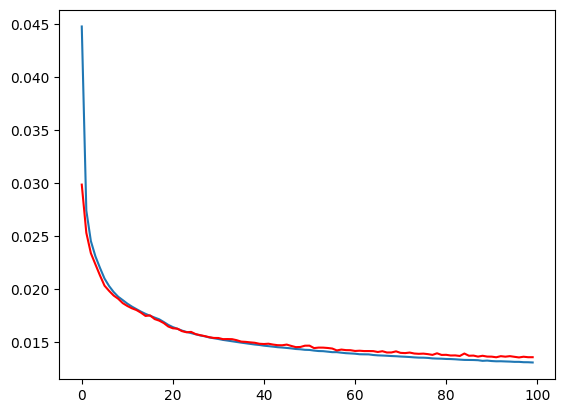

In [21]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'],c ='red')

In [17]:
inp_layer = Input(shape = (784,), name = 'inp')

h1 = Dense(256, activation = 'relu', name ='h1')(inp_layer)
h2 = Dense(128, activation = 'relu', name = 'h2')(h1)
h3 = Dense(64, activation = 'relu', name = 'h3')(h2)
h4 = Dense(16, activation = 'relu', name = 'h4')(h3)

h5 = Dense(64, activation = 'relu', name = 'h5')(h4)
h6 = Dense(128, activation = 'relu', name = 'h6')(h5)
h7 = Dense(256, activation = 'relu', name = 'h7')(h6)
h8 = Dense(784, activation = 'softmax', name = 'h8')(h7)

model2 = Model(inp_layer,h8)

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'mape')

hist2 = model2.fit(X_train, X_train, epochs = 100, batch_size = 256, shuffle = True, validation_data = (X_test,X_test))


Epoch 1/100
235/235 [==============================] - 4s 7ms/step - loss: 0.2495 - mape: 444981.8438 - val_loss: 0.1690 - val_mape: 168872.2188
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1547 - mape: 135825.3438 - val_loss: 0.1436 - val_mape: 96419.8594
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1363 - mape: 81217.2656 - val_loss: 0.1300 - val_mape: 60606.3164
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1266 - mape: 58455.4844 - val_loss: 0.1224 - val_mape: 49343.4961
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1208 - mape: 47364.0977 - val_loss: 0.1174 - val_mape: 38972.8711
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1169 - mape: 40725.1484 - val_loss: 0.1140 - val_mape: 34857.2734
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1137 - mape: 35807.4844 - val_loss: 0.1113 - val_mape: 29928.8

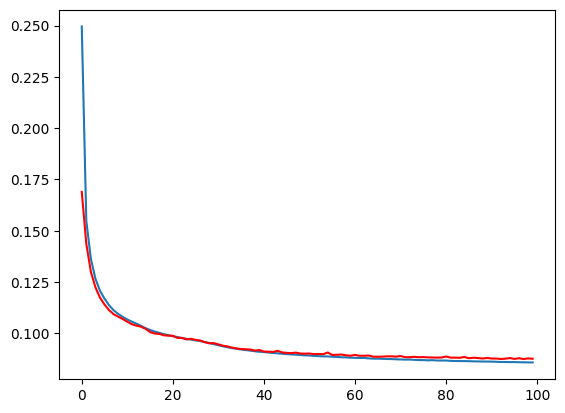

In [18]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'],c ='red')

#Both model have performed well now lets see results

In [22]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

313/313 [==============================] - 1s 2ms/step


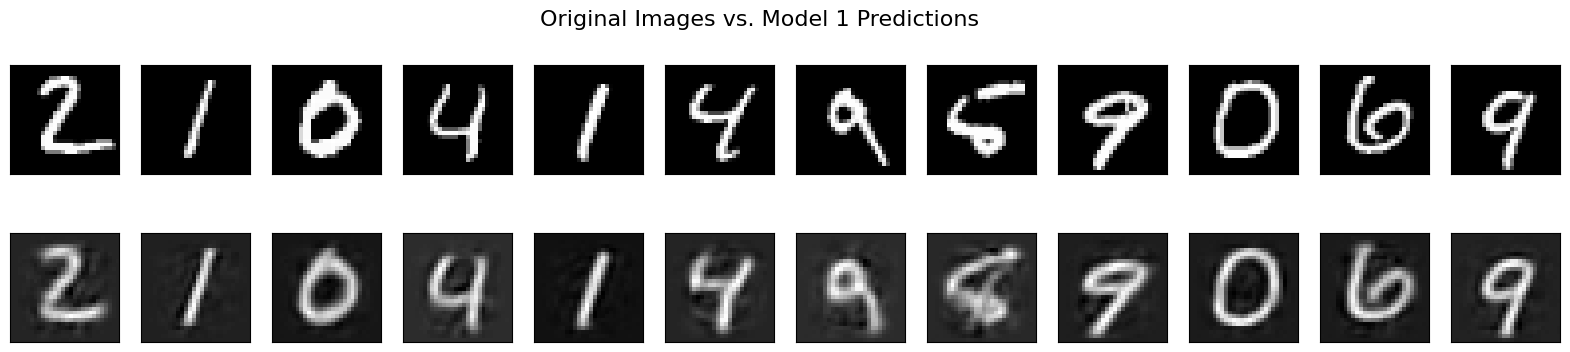

In [34]:
n = 12
plt.figure(figsize = (20,4))
for i in range(1,n+1):
  ax= plt.subplot(2,n,i)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

  ax= plt.subplot(2,n,i+n)
  plt.imshow(pred1[i].reshape(28,28))
  plt.gray()
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

plt.suptitle('Original Images vs. Model 1 Predictions', fontsize=16)
plt.show()

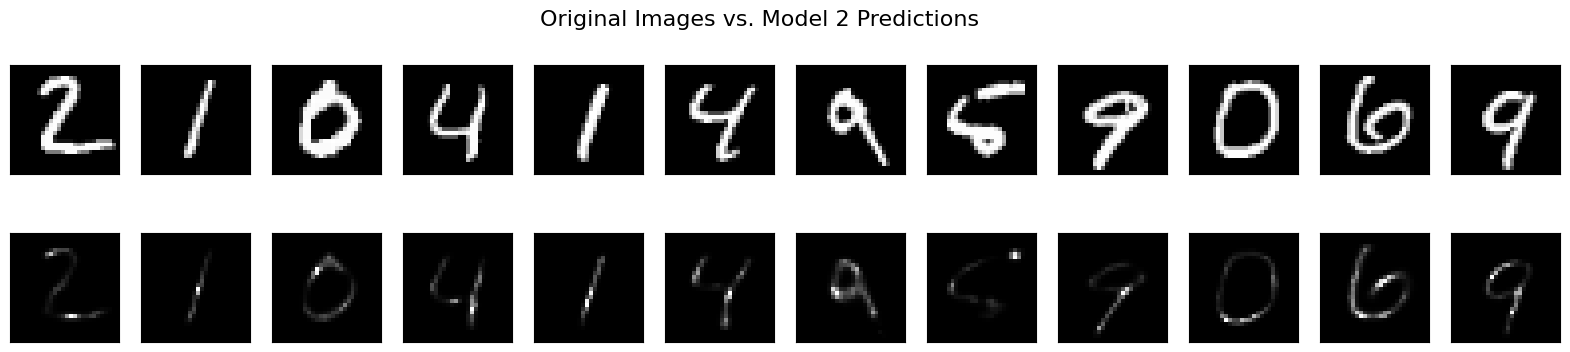

In [55]:
n = 12
plt.figure(figsize = (20,4))
for i in range(1,n+1):
  ax= plt.subplot(2,n,i)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

  ax= plt.subplot(2,n,i+n)
  plt.imshow(pred2[i].reshape(28,28))
  plt.gray()
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

plt.suptitle('Original Images vs. Model 2 Predictions', fontsize=16)
plt.show()

Let's use model1 for generating embeddings

In [36]:
model1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inp (InputLayer)            [(None, 784)]             0         
                                                                 
 h1 (Dense)                  (None, 256)               200960    
                                                                 
 h2 (Dense)                  (None, 128)               32896     
                                                                 
 h3 (Dense)                  (None, 64)                8256      
                                                                 
 h4 (Dense)                  (None, 16)                1040      
                                                                 
 h5 (Dense)                  (None, 64)                1088      
                                                                 
 h6 (Dense)                  (None, 128)               8320

In [38]:
emb_model = Model(model1.input, model1.layers[4].output)

# Let's encode the test data

In [41]:
emb_x_test = emb_model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [42]:
emb_x_test.shape

(10000, 16)

now lets convert this into 2D using TSNE

In [44]:
from openTSNE import TSNE

In [45]:
tsne2 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(emb_x_test)

In [47]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(sbn.husl_palette(len(np.unique(y_test))))

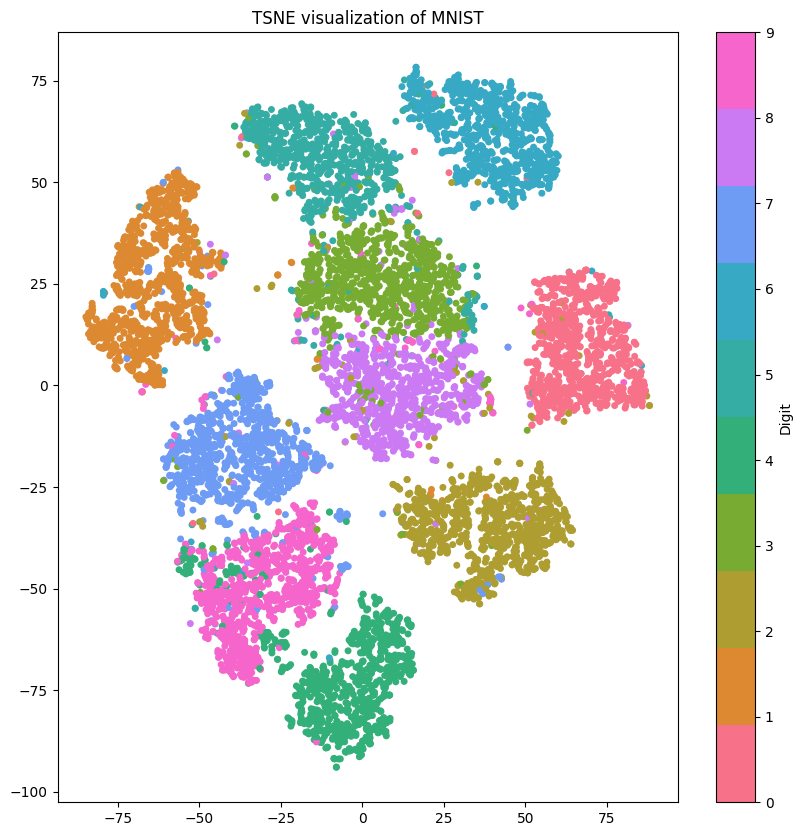

In [48]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_title('TSNE visualization of MNIST')
im = ax.scatter(tsne2[:,0], tsne2[:,1], s=25, c=y_test, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

# So i can see that due to embedding, the input images are converted to a particular dimension and in that latent space, the similar images have similar vectors. now when those vectors were converted in 2D using TSNE we can see clear patterns that they are different

lets see denoising application

In [49]:

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()




In [50]:
#Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Reshape
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [51]:

#add NOISE
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train.shape)
print(x_train_noisy.shape)
print(x_test.shape)
print(x_test_noisy.shape)

(60000, 784)
(60000, 784)
(10000, 784)
(10000, 784)


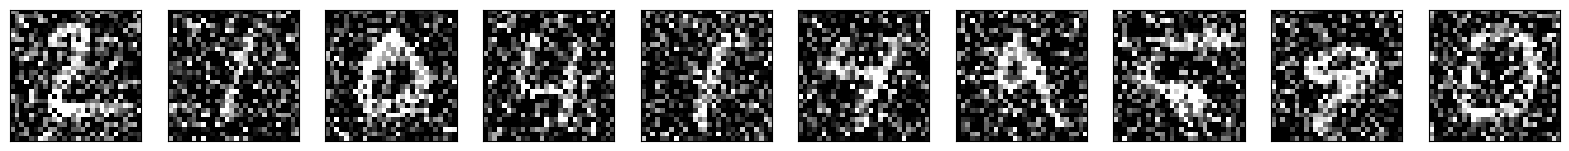

In [52]:
n = 10
fig,ax= plt.subplots(1,10,figsize = (20,2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
# showing the noisy images

In [54]:
inp_layer = Input(shape = (784,), name = 'inp')

h1 = Dense(256, activation = 'relu', name ='h1')(inp_layer)
h2 = Dense(128, activation = 'relu', name = 'h2')(h1)
h3 = Dense(64, activation = 'relu', name = 'h3')(h2)
h4 = Dense(16, activation = 'relu', name = 'h4')(h3)

h5 = Dense(64, activation = 'relu', name = 'h5')(h4)
h6 = Dense(128, activation = 'relu', name = 'h6')(h5)
h7 = Dense(256, activation = 'relu', name = 'h7')(h6)
h8 = Dense(784, activation = 'linear', name = 'h8')(h7)

model3 = Model(inp_layer,h8)

model3.compile(optimizer = 'adam', loss = 'mean_squared_error')

hist3 = model3.fit(x_train_noisy, x_train, epochs = 100, batch_size = 256, shuffle = True, validation_data = (x_test_noisy,x_test))

Epoch 1/100
235/235 [==============================] - 4s 7ms/step - loss: 0.0539 - val_loss: 0.0403
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0364 - val_loss: 0.0335
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0322 - val_loss: 0.0309
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0302 - val_loss: 0.0295
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0289 - val_loss: 0.0284
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0280 - val_loss: 0.0278
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0272 - val_loss: 0.0272
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0265 - val_loss: 0.0266
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0258 - val_loss: 0.0259
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0253 - val_lo

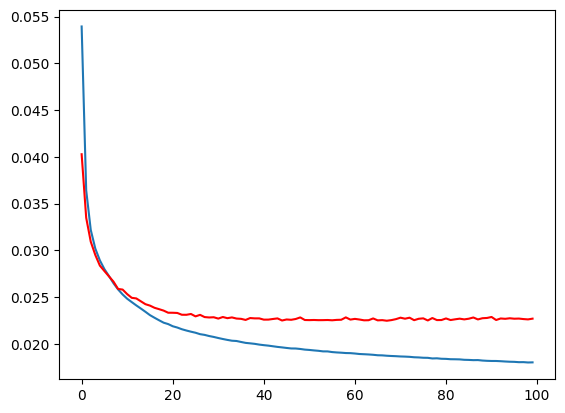

In [59]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'],c ='red')

In [56]:
pred3 = model3.predict(x_test_noisy)

313/313 [==============================] - 1s 4ms/step


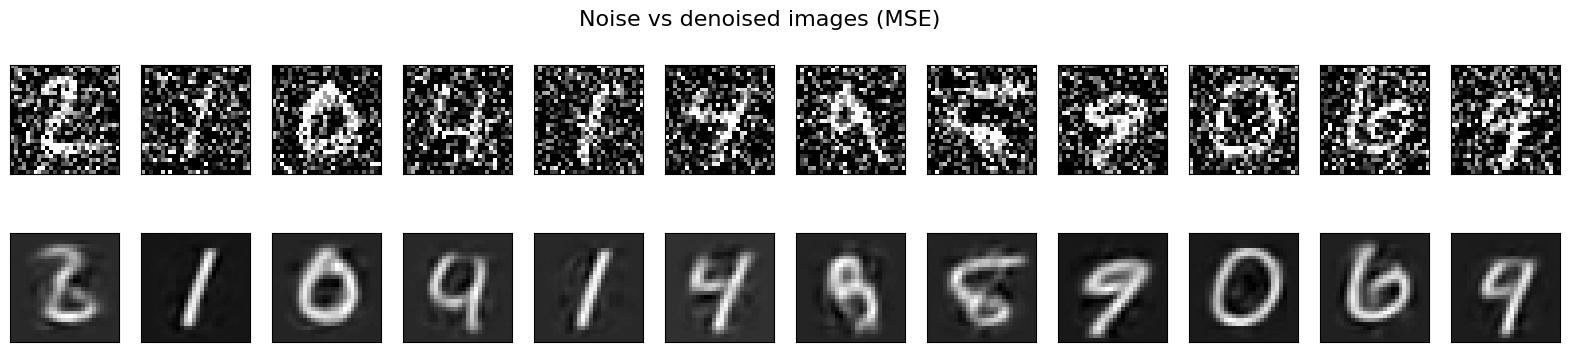

In [60]:
n = 12
plt.figure(figsize = (20,4))
for i in range(1,n+1):
  ax= plt.subplot(2,n,i)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

  ax= plt.subplot(2,n,i+n)
  plt.imshow(pred3[i].reshape(28,28))
  plt.gray()
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

plt.suptitle('Noise vs denoised images (MSE)', fontsize=16)
plt.show()

In [61]:
inp_layer = Input(shape = (784,), name = 'inp')

h1 = Dense(256, activation = 'relu', name ='h1')(inp_layer)
h2 = Dense(128, activation = 'relu', name = 'h2')(h1)
h3 = Dense(64, activation = 'relu', name = 'h3')(h2)
h4 = Dense(16, activation = 'relu', name = 'h4')(h3)

h5 = Dense(64, activation = 'relu', name = 'h5')(h4)
h6 = Dense(128, activation = 'relu', name = 'h6')(h5)
h7 = Dense(256, activation = 'relu', name = 'h7')(h6)
h8 = Dense(784, activation = 'sigmoid', name = 'h8')(h7)

model4 = Model(inp_layer,h8)

model4.compile(optimizer = 'adam', loss = 'binary_crossentropy')

hist4 = model4.fit(x_train_noisy, x_train, epochs = 100, batch_size = 256, shuffle = True, validation_data = (x_test_noisy,x_test))

Epoch 1/100
235/235 [==============================] - 5s 9ms/step - loss: 0.2624 - val_loss: 0.2081
Epoch 2/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1845 - val_loss: 0.1698
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1646 - val_loss: 0.1595
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1553 - val_loss: 0.1522
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1501 - val_loss: 0.1490
Epoch 6/100
235/235 [==============================] - 2s 11ms/step - loss: 0.1460 - val_loss: 0.1440
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1417 - val_loss: 0.1403
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1380 - val_loss: 0.1376
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1354 - val_loss: 0.1360
Epoch 10/100
235/235 [==============================] - 2s 11ms/step - loss: 0.1331 - v

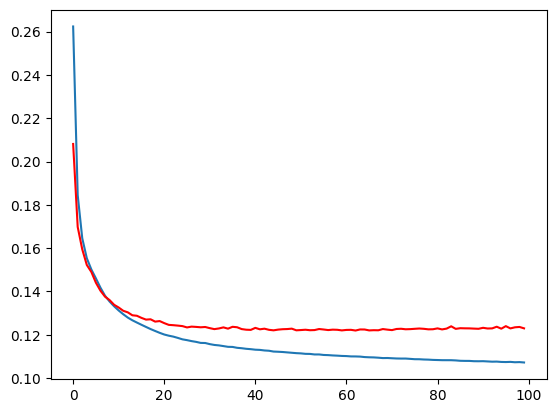

In [62]:
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'],c ='red')

In [63]:
pred4 = model4.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


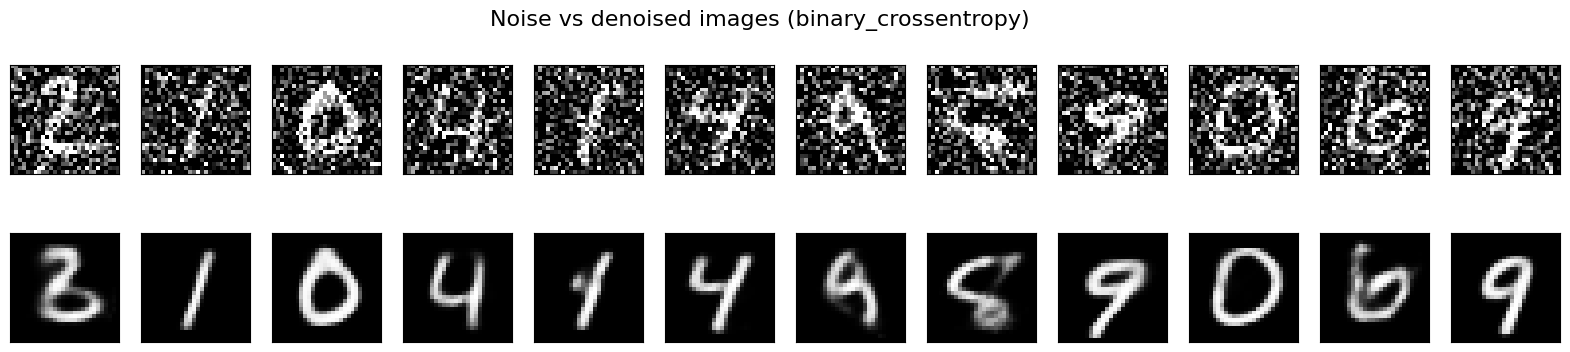

In [64]:
n = 12
plt.figure(figsize = (20,4))
for i in range(1,n+1):
  ax= plt.subplot(2,n,i)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

  ax= plt.subplot(2,n,i+n)
  plt.imshow(pred4[i].reshape(28,28))
  plt.gray()
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

plt.suptitle('Noise vs denoised images (binary_crossentropy)', fontsize=16)
plt.show()

# Both of them did fine only

Lets do one more interesting task with autoencoders. we can make a recommendation system also

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
import numpy as np
import pandas as pd


In [67]:
!gdown 1EsPvxcp5lzdltC3yLar1_laArmk9RZpw
!gdown 1DgdthLfHLIq3AnS4YAa1bne-OM90oHoD

Downloading...
From: https://drive.google.com/uc?id=1EsPvxcp5lzdltC3yLar1_laArmk9RZpw
To: /content/ratings.csv
100% 2.48M/2.48M [00:00<00:00, 88.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DgdthLfHLIq3AnS4YAa1bne-OM90oHoD
To: /content/movies.csv
100% 516k/516k [00:00<00:00, 148MB/s]


In [68]:
ratings = pd.read_csv('ratings.csv')

In [69]:
ratings.shape

(105339, 4)

In [70]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [71]:
ratings['movieId'].nunique()

10325

In [72]:
rm = ratings.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)
rm.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [73]:
rm.shape

(10325, 668)

In [78]:
#checking how much the value is filled and how much it is empty
fill = ((rm > 0).sum().sum()/(rm.shape[0]*rm.shape[1])) *100
empty = 100 - fill

print(f'fill is {np.round(fill,2)}%')
print(f'empty is {np.round(empty,2)}%')

fill is 1.53%
empty is 98.47%


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
train, val = train_test_split(rm, test_size = 0.2)

In [81]:
X_train = train.values

In [82]:
X_val = val.values

In [83]:
input_lay = Input(shape=(668,))
h1 = Dense(512, activation='relu')(input_lay)
h2 = Dense(256, activation='relu')(h1)
h3 = Dense(128, activation='relu')(h2)


h4 = Dense(256, activation='relu')(h3)
h5 = Dense(512, activation='relu')(h4)
h6 = Dense(668, activation='linear')(h5)

In [86]:
autoencoder = Model(input_lay, h6)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [87]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val))

Epoch 1/100
33/33 [==============================] - 5s 26ms/step - loss: 0.1695 - val_loss: 0.1530
Epoch 2/100
33/33 [==============================] - 0s 13ms/step - loss: 0.1447 - val_loss: 0.1381
Epoch 3/100
33/33 [==============================] - 0s 13ms/step - loss: 0.1318 - val_loss: 0.1288
Epoch 4/100
33/33 [==============================] - 0s 10ms/step - loss: 0.1217 - val_loss: 0.1221
Epoch 5/100
33/33 [==============================] - 0s 9ms/step - loss: 0.1136 - val_loss: 0.1168
Epoch 6/100
33/33 [==============================] - 0s 6ms/step - loss: 0.1076 - val_loss: 0.1133
Epoch 7/100
33/33 [==============================] - 0s 6ms/step - loss: 0.1022 - val_loss: 0.1098
Epoch 8/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0976 - val_loss: 0.1071
Epoch 9/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0931 - val_loss: 0.1052
Epoch 10/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0898 - val_loss: 0.1035
Epoch

In [88]:
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 668)]             0         
                                                                 
 dense (Dense)               (None, 512)               342528    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dense_5 (Dense)             (None, 668)               342

In [89]:
intermediate_model = Model(autoencoder.input, autoencoder.layers[3].output)

In [91]:
embeddings = intermediate_model.predict(rm)

323/323 [==============================] - 1s 2ms/step


In [92]:
embeddings.shape

(10325, 128)

In [93]:
from sklearn.metrics.pairwise import cosine_similarity

In [94]:
similarity_matrix = cosine_similarity(embeddings)

In [95]:
similarity_matrix.shape

(10325, 10325)

In [97]:
item_sim_matrix = pd.DataFrame(similarity_matrix, index=rm.index, columns=rm.index)
item_sim_matrix.head() #Item-similarity Matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.687467,0.692094,0.539194,0.692512,0.560542,0.695286,0.665014,0.570005,0.678109,...,0.579658,0.636641,0.573726,0.654562,0.607956,0.498091,0.513317,0.640558,0.539152,0.633211
2,0.687467,1.000000,0.657095,0.665880,0.646745,0.644970,0.692698,0.760672,0.610635,0.760353,...,0.602056,0.690828,0.651930,0.704829,0.635894,0.576940,0.585943,0.693780,0.641107,0.688023
3,0.692094,0.657095,1.000000,0.700142,0.773068,0.658674,0.726692,0.739178,0.723850,0.613419,...,0.585645,0.654043,0.633472,0.659289,0.631983,0.562615,0.568382,0.654974,0.644145,0.652978
4,0.539194,0.665880,0.700142,1.000000,0.704762,0.739891,0.738730,0.870005,0.759895,0.661484,...,0.705094,0.726543,0.750934,0.738038,0.721636,0.688825,0.695549,0.729640,0.718442,0.724012
5,0.692512,0.646745,0.773068,0.704762,1.000000,0.602345,0.741857,0.760674,0.639203,0.610931,...,0.565588,0.649541,0.648615,0.656048,0.602636,0.589085,0.593787,0.650944,0.614092,0.648197


In [120]:
rm

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


the similarities of movies here are in this sense: lets say a movie is watch by all users so that movie id will have all its column filled in matrix rm. so if i want to see other such popular movie, i need to lookout for an movie watched by most users. this is the principle for recommendation here. it is not based on movie features or based on user liking it is all about how each movie is being rated by entire community. if i want to recommend movies for an movie, i will recommend famous movies like the asked movie.  


In [98]:
movies = pd.read_csv('movies.csv')

In [99]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [102]:
movies.loc[56]

movieId                       61
title      Eye for an Eye (1996)
genres            Drama|Thriller
Name: 56, dtype: object

Let's recommend movies for movie_name = Eye for an Eye (movie_id = 61)

In [157]:
def rec_movie(movie_name):
  similarities = item_sim_matrix[movies[movies['title'] == movie_name]['movieId'].values]
  recc = similarities[similarities.columns[0]].sort_values(ascending = False)
  recc = recc.iloc[1:11].index
  movie_list = movies[movies['movieId'].isin(recc)]
  return movie_list

In [158]:
movie_name = input()

Bogus (1996)


In [159]:
rec_movie(movie_name)

,movieId,title,genres
556,633,Denise Calls Up (1995),Comedy
574,664,Faithful (1996),Comedy
608,716,Switchblade Sisters (1975),Crime
671,827,"Convent, The (O Convento) (1995)",Drama
678,834,Phat Beach (1996),Comedy
684,840,House Arrest (1996),Children|Comedy
920,1133,Talking About Sex (1994),Comedy|Drama
933,1167,Dear God (1996),Comedy
1066,1311,Santa with Muscles (1996),Comedy
1069,1318,Blue Juice (1995),Comedy|Drama


# Thanks guys! see u soon